<h1 style="text-align: center;">Movie Analysis </h1>



In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Question 1: What types of films have the highest gross?

To answer this question, we look at the box office gross earnings  various movies.

In [2]:
#reading the budgets dataset
tn_movie_budgets = pd.read_csv("data/tn.movie_budgets.csv")
tn_movie_budgets .head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#remove dollar signs from the columns
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From previewing the data, we notice that the columns we have no null values. Moreover, `production_budget`, `domestic_gross` and `worldwide_gross` are of datatype object yet they should be floats. 

Additionally, the `release_date` column is of object datatype. It needs to be converted to datetime to be ale to work with it.

Below, we convert them to the correct datatypes.

In [4]:
pd.options.display.float_format = '{:.2f}'.format

# we notice our currency columns are of object type and we want them to be floats
tn_movie_budgets["production_budget"] = tn_movie_budgets["production_budget"].replace("[$,]", "", regex=True).astype(float)
tn_movie_budgets["worldwide_gross"] = tn_movie_budgets["worldwide_gross"].replace("[$,]", "", regex=True).astype(float)
tn_movie_budgets["domestic_gross"] = tn_movie_budgets["domestic_gross"].replace("[$,]", "", regex=True).astype(float)
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00


In [5]:
# convert `release_date` to datetime
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

In [6]:
# confirm datatype changes
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [7]:
# create profit column to exclude production costs from the revenues

tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']


In [8]:
# check the top perfoming movies
top_20_movies=tn_movie_budgets.nlargest (n=20, columns='worldwide_gross')
top_20_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00
42,43,1997-12-19,Titanic,200000000.00,659363944.00,2208208395.00,2008208395.00
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,1747311220.00
6,7,2018-04-27,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,1748134200.00
33,34,2015-06-12,Jurassic World,215000000.00,652270625.00,1648854864.00,1433854864.00
66,67,2015-04-03,Furious 7,190000000.00,353007020.00,1518722794.00,1328722794.00
26,27,2012-05-04,The Avengers,225000000.00,623279547.00,1517935897.00,1292935897.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1072413963.00
41,42,2018-02-16,Black Panther,200000000.00,700059566.00,1348258224.00,1148258224.00
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.00,381193157.00,1341693157.00,1216693157.00


In [9]:
tn_movie_budgets.describe()

,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
count,5782.00,5782,5782.00,5782.00,5782.00,5782.00
mean,50.37,2004-07-06 05:20:31.546177792,31587757.10,41873326.87,91487460.91,59899703.81
min,1.00,1915-02-08 00:00:00,1100.00,0.00,0.00,-200237650.00
25%,25.00,2000-04-22 18:00:00,5000000.00,1429534.50,4125414.75,-2189070.75
50%,50.00,2007-03-02 00:00:00,17000000.00,17225945.00,27984448.50,8550285.50
75%,75.00,2012-12-25 00:00:00,40000000.00,52348661.50,97645836.50,60968501.75
max,100.00,2020-12-31 00:00:00,425000000.00,936662225.00,2776345279.00,2351345279.00
std,28.82,NaN,41812076.83,68240597.36,174719968.78,146088881.08


* The average worldwide_gross is $91,487,460.91.

* 25 % of the movies have a worldwide gross less than $4,125,414.75. 
* 50% of the movies have a worldwide gross less than $27,984,448.50.
* 75% of movies have a worldwide gross less than $97,645,836.50


`worlwide_gross` has a wide range of from $0 to $2,776,345,279.00. 


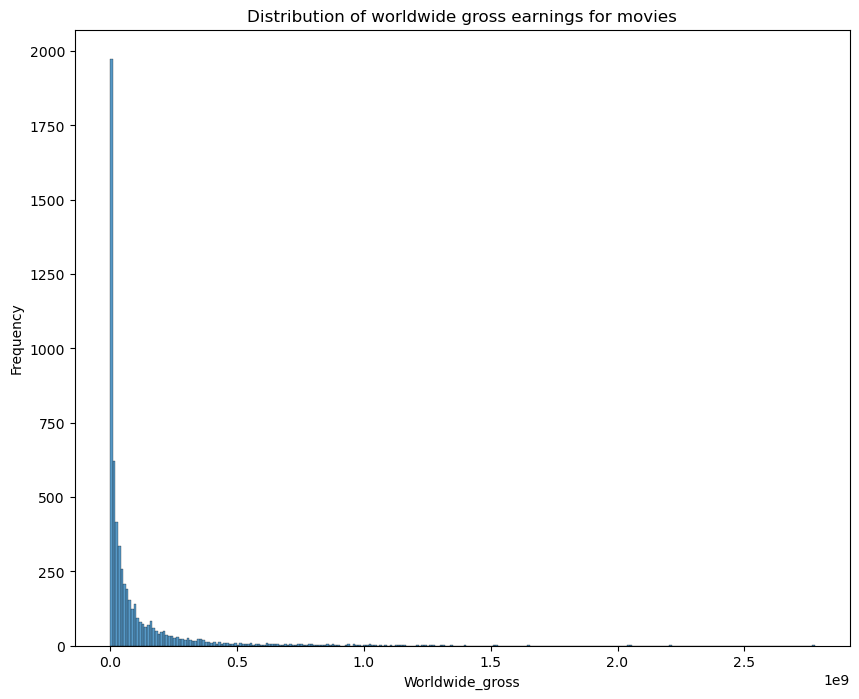

In [10]:

#plot distribution of worldwide earnings
fig , ax = plt.subplots(figsize = (10,8))

total_gross = tn_movie_budgets['worldwide_gross']
sns.histplot(total_gross)
ax.set_xlabel('Worldwide_gross')
ax.set_ylabel('Frequency')
plt.title("Distribution of worldwide gross earnings for movies")
plt.show();

From the above graph, we have a skewed distribution with a few movies earning exceptionally high revenues. This also explains the differences between our mean and median values.

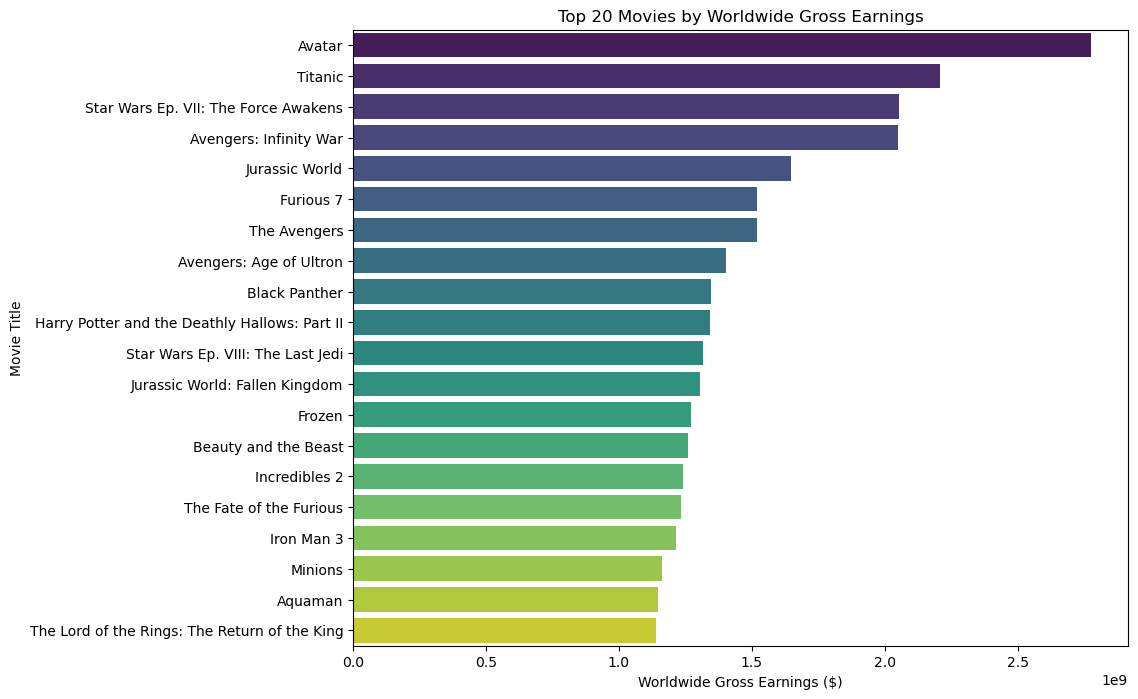

In [11]:
# Plot a bar plot of the top 20 movies by worldwide gross
fig , ax = plt.subplots(figsize = (10,8))

sns.barplot(x='worldwide_gross', y='movie', data=top_20_movies, ax=ax, palette='viridis')

# Set axis labels and title
ax.set_xlabel('Worldwide Gross Earnings ($)')
ax.set_ylabel('Movie Title')
plt.title('Top 20 Movies by Worldwide Gross Earnings')

# Show the plot
plt.show()

The movie with the highest revenue at approximately $2.8 million is Avatar.

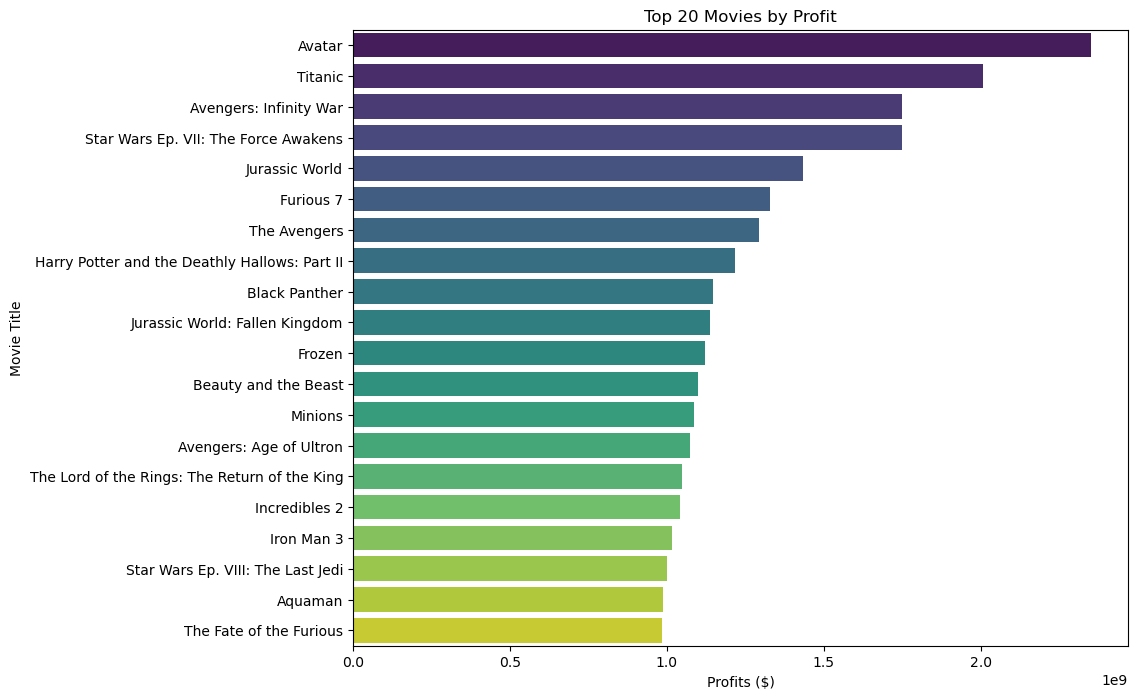

In [12]:
fig , ax = plt.subplots(figsize = (10,8))
# get the top 20 profitable movies
top_profitable = tn_movie_budgets.nlargest(n = 20, columns= 'profit')

sns.barplot(x='profit', y='movie', data=top_profitable, ax=ax, palette='viridis')

# Set axis labels and title
ax.set_xlabel('Profits ($)')
ax.set_ylabel('Movie Title')
plt.title('Top 20 Movies by Profit')

# Show the plot
plt.show()

### Are there seasonal trends in movie performance, and when is the best time to release a movie?
Are there seasonal patterns in movie performance?
When is the best time to release a movie for maximum revenue?

In [13]:
#  to analyze trends of time, we use the datetime column `releade_date`
# extract year and month from our datetime column
tn_movie_budgets['year'] = tn_movie_budgets['release_date'].dt.year
tn_movie_budgets['month'] = tn_movie_budgets['release_date'].dt.month_name()

tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year,month
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,2009,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,635063875.00,2011,May
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,-200237650.00,2019,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1072413963.00,2015,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,999721747.00,2017,December


In [14]:
# show the percentage of movie releases by month

month_counts = tn_movie_budgets['month'].value_counts(normalize=True) * 100
print(month_counts)


month
December    12.88
October      9.91
August       8.58
September    8.53
November     8.41
June         8.28
March        8.13
April        7.85
July         7.61
May          7.04
February     6.78
January      6.00
Name: proportion, dtype: float64


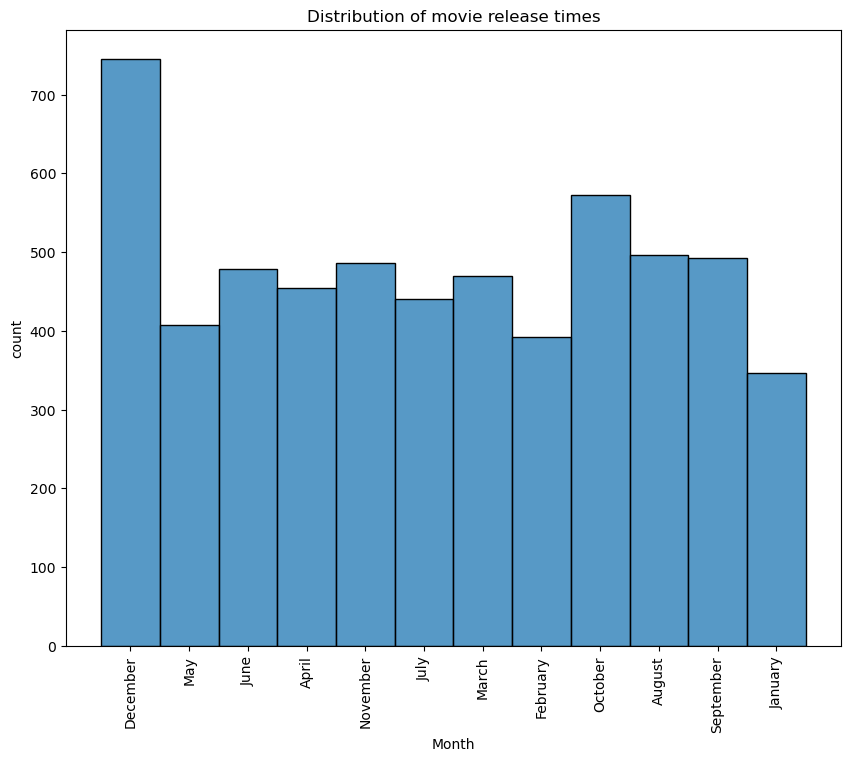

In [15]:
# plot distribution of movie release months
fig, ax = plt.subplots(figsize = (10,8))

sns.histplot(tn_movie_budgets['month'])
ax.set_xlabel('Month')
ax.set_ylabel('count')
ax.set_title('Distribution of movie release times')

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show();

12.88% of the movies are released in December, followed by October at 9.91% and then August at 8.58%.

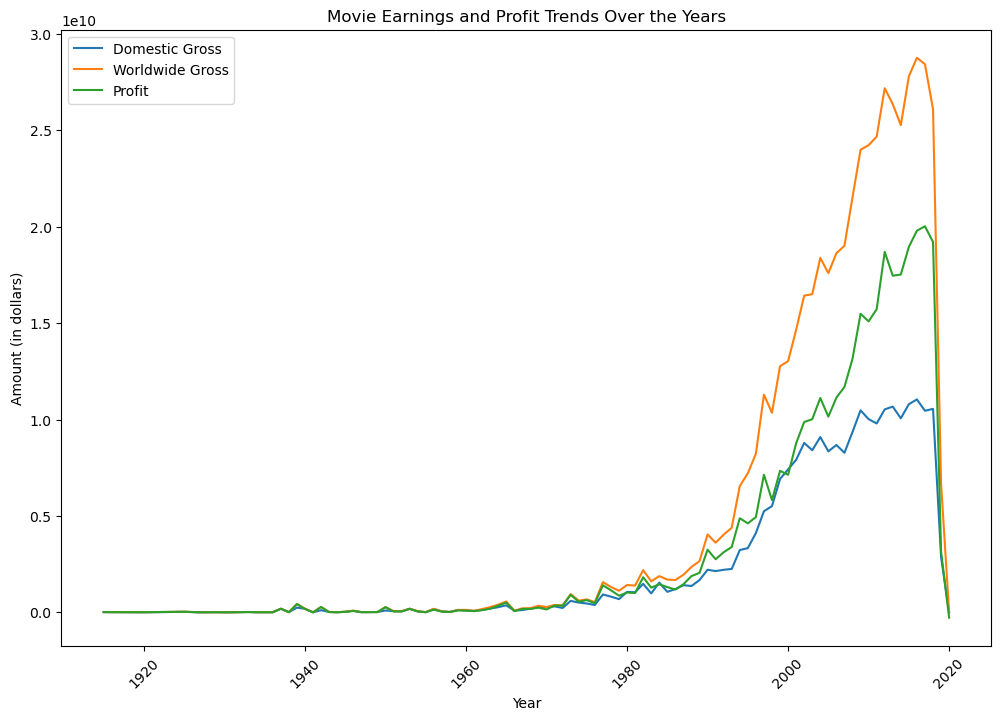

In [16]:
# plot movie earnings trends over the years and profits
# Aggregate data by year
yearly_data = tn_movie_budgets.groupby('year').agg({
    'domestic_gross': 'sum',
    'worldwide_gross': 'sum',
    'profit': 'sum'
}).reset_index()

# Plot the trends
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=yearly_data, x='year', y='domestic_gross', label='Domestic Gross', ax=ax)
sns.lineplot(data=yearly_data, x='year', y='worldwide_gross', label='Worldwide Gross', ax=ax)
sns.lineplot(data=yearly_data, x='year', y='profit', label='Profit', ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('Amount (in dollars)')
ax.set_title('Movie Earnings and Profit Trends Over the Years')
plt.xticks(rotation=45)
plt.legend()

plt.show();
